In [ ]:
'''
     ESCUELA POLITÉCNICA NACIONAL
FUNDAMENTOS DE INTELIGENCIA ARTIFICIAL

Integrantes:
- Raúl Tenorio
- Leonel Molina
- Ariel Calderón
- Mateo Cueva

'''

In [ ]:
# CLASIFICADOR DE IMÁGENES DE ROPA

# IMPORTACIÓN DE LIBRERÍAS
# Librería general de tensorflow
import tensorflow as tf 

# Librería de tensorflow para traer el dataset con las imágenes de ropa directamente
import tensorflow_datasets as tfds 

# Librería de matplotlib para mostrar gráficamente las imágenes del dataset
import matplotlib.pyplot as plt

# Librería de apoyo que permite realizae operaciones matemáticas complejas
import math

# Librería para manejar los pixeles de las imágenes como arrays de dos dimensiones
import numpy as np

In [ ]:
# Se descarga el dataset de la empresa "Fashion MNIST" de Zalando quienes realizaron una recopilación de 70000 imágenes de ropa
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

# Se imprime en pantalla la variable "metadatos" para visualizar la información que contiene el mismo
print(metadatos)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [ ]:
# Tal y como se puede observar en el dataset, se incluyen 60000 datos para el entrenaiento del algoritmo y 10000 para probarlo
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

# Etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

# Una vez obtenidas las categorías que contiene el dataset, se procede a traducir los labels obtenidos al idioma español e imprimirlos en pantalla
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Se traducen las salidas al idioma es español para una mejor comprensión
nombres_clases = ['Camiseta/Parte Superior', 'Pantalón', 'Buzo', 'Vestido', 'Saco', 'Sandalia', 'Camisa', 'Zapatilla de Deporte', 'Bolsa', 'Botín']

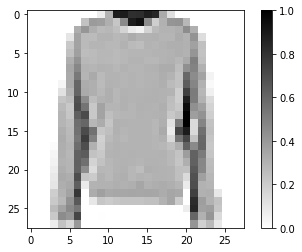

In [ ]:
# Se procede a definir una función que se encargue de normalizar los datos que se tienen para transformar la gama de colores blanco y negro de 0 a 255 al rango de 0 y 1 
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # Aqui se transforma de 0-255 a 0-1
  return imagenes, etiquetas

# Se hace un mapeo de los datos de entrenamiento y de pruebas
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Ahora, se procede a utilizar los datos en memoria caché en vez del disco, ya que, de esta manera el tiempo de ejecución en entrenamiento tarda menos
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

# Para comprobar que el procedimiento se está realizando de manera correcta, se toma la primera imagen del dataset y utilizando la librería de matplotlib se muestra el resultado
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) # Se aplica al redimensionamiento de 100x100px a 28x28px

# Se dibuja la primera imagen del dataset
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

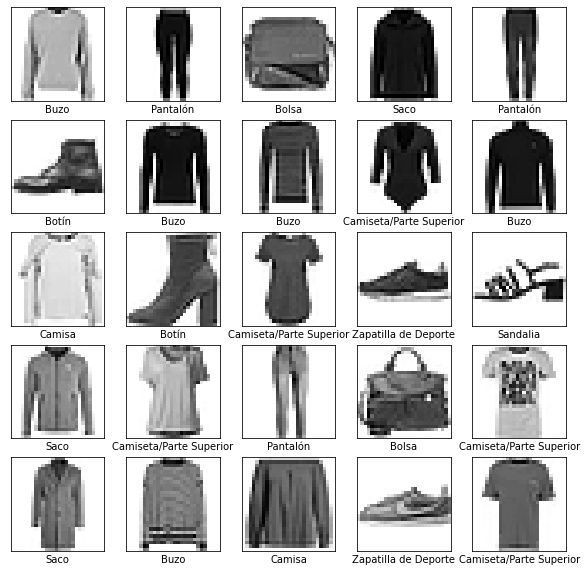

In [ ]:
# Ahora que tenemos dicha comprobación, se muestran más imágenes para su última verificación
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28)) # Se aplica el redimensionamiento de nuevo
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False) # Se deshabilitan las líneas grid del gráfico
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
# Se crea el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), # El atributo 1 quiere decir que se renocen como imágenes en escala de grises (blanco y negro)
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Se aplican para las redes de clasificación
])

# Se hace uso del modelo creado
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Obtenemos el número de datos para entrenamiento y pruebas
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

# Se imprimen los números obtenidos
print(num_ej_entrenamiento)
print(num_ej_pruebas)

# Para que la carga de los datos no se haga tardada, se trabajarán por lotes de 32 imágenes
TAMANO_LOTE = 32

# Las funciones de "shuffle" y "repeat" mezclan aletoriamente los datos para que la red no aprenda ningún tipo de orden en la organización de las imágenes
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

# Se procede a realizar el entrenamiento enviando todas las variables calculadas con anterioridad
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

60000
10000
Epoch 1/5
1875/1875 [==============================] - 7s 1ms/step - loss: 0.5235 - accuracy: 0.8146
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3861 - accuracy: 0.8594
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3474 - accuracy: 0.8734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3281 - accuracy: 0.8786
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3088 - accuracy: 0.8851


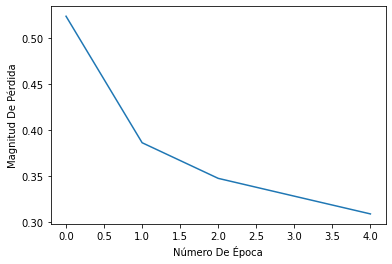

In [ ]:
# Ahora, se procede a visualizar una gráfica que muestra la magnitud de la pérdida en la información
plt.xlabel("Número De Época")
plt.ylabel("Magnitud De Pérdida")
plt.plot(historial.history["loss"])

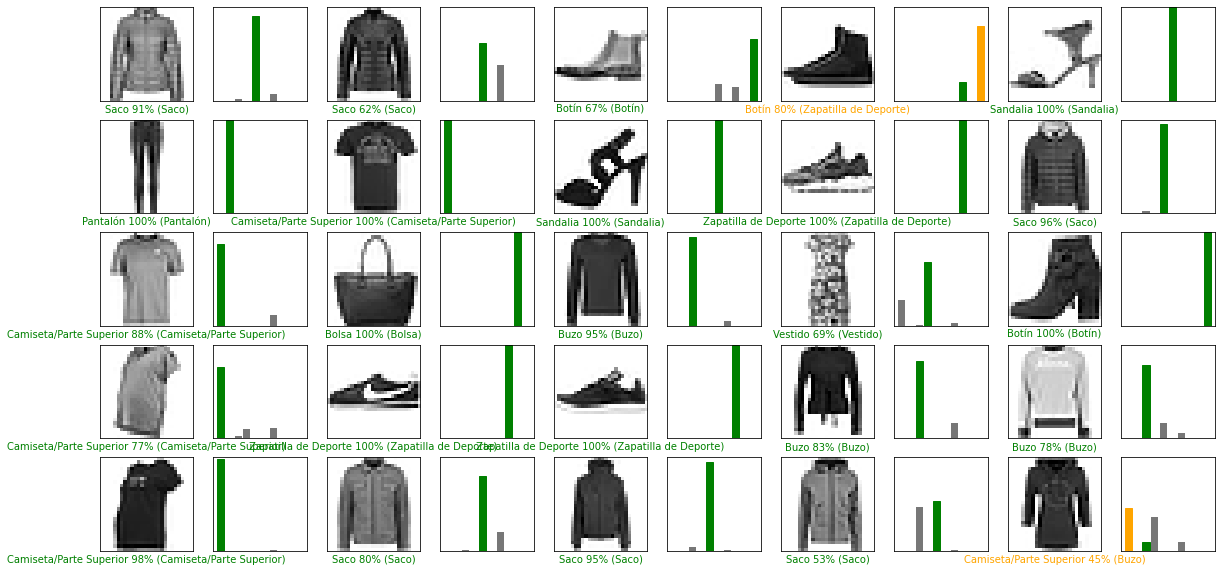

In [ ]:
# Se procede a realizar predicciones gráficas pintando una cuadricula marcando si fue correcta "verde" o incorrecta "naranja"
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'green'
  else:
    color = 'orange'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('orange')
  grafica[etiqueta_real].set_color('green')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
# Finalmente, si se quiere probar una imagen a libre criterio hay que recordar que solamente dispondremos del último lote cargado en memoria el cual consta de 32 imágenes
imagen = imagenes_prueba[7] # Aquí se pueden seleccionar las imágenes en las posiciones del 0 al 31 
imagen = np.array([imagen]) # Se transforma la imagen al array
prediccion = modelo.predict(imagen) # Se realiza la predicción

# Se imprime el resultado de la predicción en pantalla
print("Predicción: " + nombres_clases[np.argmax(prediccion[0])])

Predicción: Sandalia
